In [1]:
from data_helper import timeserie2image, read_files, preprocess_data, preprocess_data2, timeseries2imageRP
train_data, train_y, validation_data, validation_y, test_data, test_y = read_files()
test_x = preprocess_data2(test_data)

Users used for training:  [ 5  6  7 11 14 16 17 21 22 23 26 28 29 30]
Users used for validation:  [ 1 27 25  3 15  8 19]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

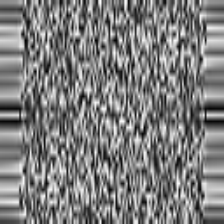

In [ ]:
next(iter(test_x))

<Axes: title={'center': 'Count (target)'}, xlabel='0'>

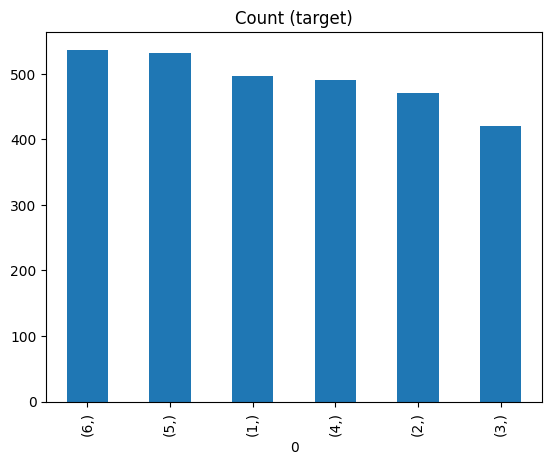

In [9]:
test_y.value_counts().plot(kind='bar', title='Count (target)')

In [3]:
from data_helper import timeserie2image, read_files, preprocess_data
import numpy as np
import pandas as pd
from dataset import UCIHARDataset
from transform import Transform, ResizeTransform
import torch
from barlowtwins import BarlowTwins
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint
from lightning.pytorch.trainer import Trainer
import datetime
import os
from classifier import SSLClassifier
from torch import nn, set_float32_matmul_precision
from torchvision.transforms import ToPILImage, Resize

set_float32_matmul_precision('medium')
np.random.seed(42)

# def main(args):
prediction_head = nn.Sequential(
    # From (512,1,1) to (512)
    # nn.Flatten(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 6)
)

model = BarlowTwins.load_from_checkpoint(f'TRY1/BT-PRETEXT-model.ckpt')
classifier = SSLClassifier.load_from_checkpoint(
    f'TRY1/BT-DOWNSTREAM-model.ckpt',
    backbone=model.backbone,
    prediction_head=prediction_head, freeze_backbone=False
    )

C:\Users\dpalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lightning\pytorch\utilities\migration\utils.py:56: The loaded checkpoint was produced with Lightning v2.2.4, which is newer than your current Lightning version: v2.2.1


In [ ]:
from data_helper import timeserie2image, read_files, preprocess_data
import numpy as np
import pandas as pd
from dataset import UCIHARDataset
from transform import Transform, ResizeTransform
import torch
from barlowtwins import BarlowTwins
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint
from lightning.pytorch.trainer import Trainer
import datetime
import os
from classifier import SSLClassifier
from torch import nn, set_float32_matmul_precision
from torchvision.transforms import ToPILImage, Resize

set_float32_matmul_precision('medium')
np.random.seed(42)

def main(args):
    prediction_head = nn.Sequential(
        # From (512,1,1) to (512)
        # nn.Flatten(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Linear(256, 6)
    )
    
    model = BarlowTwins.load_from_checkpoint(f'{args.dirpath}/BT-PRETEXT-{args.filename}.ckpt')
    classifier = SSLClassifier.load_from_checkpoint(
        f'TRY1/BT-DOWNSTREAM-model.ckpt',
        # backbone=model.backbone,
        # prediction_head=prediction_head, freeze_backbone=True
        )
    classifier = SSLClassifier(backbone=model.backbone, prediction_head=prediction_head, freeze_backbone=True)

    model = BarlowTwins.load_from_checkpoint(f'{model_folder}/model.ckpt')
    classifier = SSLClassifier(backbone=model.backbone, prediction_head=prediction_head, freeze_backbone=True)


np.random.seed(42)

train_data, train_y, validation_data, validation_y, test_data, test_y = read_files()
test_x = preprocess_data(test_data)

test_dataset = UCIHARDataset(test_x, test_y, transform=ResizeTransform(), output_num=1)

test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False)

classifier = SSLClassifier.load_from_checkpoint(f'{model_folder}TEST/model.ckpt', backbone=model.backbone, prediction_head=prediction_head, freeze_backbone=True)
# classifier = SSLClassifier(backbone=model.backbone, prediction_head=prediction_head, freeze_backbone=True)

trainer = Trainer(accelerator="gpu", devices=[0])
# trainer.fit(model=classifier, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

predictions = trainer.predict(model=classifier, dataloaders=test_dataloader, return_predictions=True)
y_orig = []
y_pred = []
for pred_list in predictions:
    y_orig.extend(pred_list[1].tolist())
    y_pred.extend(pred_list[0].tolist())

from torchmetrics.classification import MulticlassConfusionMatrix
target = torch.tensor(y_orig)
preds = torch.tensor(y_pred)
metric = MulticlassConfusionMatrix(num_classes=6)
print(metric(preds, target))


# print(torch.stack(predictions).shape)
# y_orig = [val[1] for val in predictions]


In [1]:
from data_helper import timeserie2image, read_files
import numpy as np
import pandas as pd
from dataset import UCIHARDataset
from transform import Transform
import torch
from barlowtwins import BarlowTwins
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint
from lightning.pytorch.trainer import Trainer
import datetime


np.random.seed(42)

In [2]:
train_data, train_y, validation_data, validation_y, test_data, test_y = read_files()

In [3]:
from PIL import Image
import torch
from torchvision import transforms

train_x = []
for i in range(train_data.shape[0]):
    signal = train_data.iloc[i,:].values.reshape(9, -1)
    image = timeserie2image(signal)
    image = np.array([image, image, image])
    image = torch.tensor(image)
    image = transforms.ToPILImage()(image)
    image = transforms.Resize((224, 224))(image)
    # image = transforms.ToTensor()(image)
    train_x.append(image)
# train_x = torch.stack(train_x)
# train_x = torch.tensor(np.array(train_x))

validation_x = []
for i in range(validation_data.shape[0]):
    signal = validation_data.iloc[i,:].values.reshape(9, -1)
    image = timeserie2image(signal)
    image = np.array([image, image, image])
    validation_x.append(image)
validation_x = torch
# validation_x = torch.tensor(np.array(validation_x))

test_x = []
for i in range(test_data.shape[0]):
    signal = test_data.iloc[i,:].values.reshape(9, -1)
    image = timeserie2image(signal)
    image = np.array([image, image, image])
    test_x.append(image)
test_x = torch.tensor(np.array(test_x))

In [4]:
print(train_x.shape, validation_x.shape, test_x.shape)

AttributeError: 'list' object has no attribute 'shape'

In [5]:
train_dataset = UCIHARDataset(train_x, train_y, transform=Transform())
# val_dataset = UCIHARDataset(validation_x, validation_y, transform=Transform())
# test_dataset = UCIHARDataset(test_x, test_y, transform=Transform())

In [6]:
iterv = iter(train_dataset)

In [7]:
next(iterv)[2]

5

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=256, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False)

In [ ]:
bt_model = BarlowTwins()
current_date = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [ ]:
early_stopping = EarlyStopping('val_loss', patience=100, verbose=True, mode='min')
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',  # Monitor validation loss
    mode='min',          # 'min' mode means the checkpoint will be saved when the monitored quantity decreases
    save_top_k=1,        # Save the best model
    dirpath=current_date,  # Directory to save the checkpoints
    filename='model',  # Filename format
)
trainer = Trainer(limit_train_batches=1.0, max_epochs=100000, callbacks=[early_stopping, checkpoint_callback], accelerator="gpu", devices="auto")
trainer.fit(model=bt_model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(limit_train_batches=1.0)` was configured so 100% of the batches per epoch will be used..
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:

base_dir = 'data/UCIHAR/dataset/UCI HAR Dataset'
# Training data
# Train users
train_users = pd.read_csv(f'{base_dir}/train/subject_train.txt', header=None)
# Train accelerometer data
train_acc_x = pd.read_csv(f'{base_dir}/train/Inertial Signals/body_acc_x_train.txt', delim_whitespace=True, header=None)
train_acc_y = pd.read_csv(f'{base_dir}/train/Inertial Signals/body_acc_y_train.txt', delim_whitespace=True, header=None)
train_acc_z = pd.read_csv(f'{base_dir}/train/Inertial Signals/body_acc_z_train.txt', delim_whitespace=True, header=None)
# Train gyroscope data
train_gyro_x = pd.read_csv(f'{base_dir}/train/Inertial Signals/body_gyro_x_train.txt', delim_whitespace=True, header=None)
train_gyro_y = pd.read_csv(f'{base_dir}/train/Inertial Signals/body_gyro_y_train.txt', delim_whitespace=True, header=None)
train_gyro_z = pd.read_csv(f'{base_dir}/train/Inertial Signals/body_gyro_z_train.txt', delim_whitespace=True, header=None)
# Train total acc data
train_total_acc_x = pd.read_csv(f'{base_dir}/train/Inertial Signals/total_acc_x_train.txt', delim_whitespace=True, header=None)
train_total_acc_y = pd.read_csv(f'{base_dir}/train/Inertial Signals/total_acc_y_train.txt', delim_whitespace=True, header=None)
train_total_acc_z = pd.read_csv(f'{base_dir}/train/Inertial Signals/total_acc_z_train.txt', delim_whitespace=True, header=None)

# Train labels
train_y = pd.read_csv(f'{base_dir}/train/y_train.txt', header=None)

# Test data
# Test users
test_users = pd.read_csv(f'{base_dir}/test/subject_test.txt', header=None)
# Test accelerometer data
test_acc_x = pd.read_csv(f'{base_dir}/test/Inertial Signals/body_acc_x_test.txt', delim_whitespace=True, header=None)
test_acc_y = pd.read_csv(f'{base_dir}/test/Inertial Signals/body_acc_y_test.txt', delim_whitespace=True, header=None)
test_acc_z = pd.read_csv(f'{base_dir}/test/Inertial Signals/body_acc_z_test.txt', delim_whitespace=True, header=None)
# Test gyroscope data
test_gyro_x = pd.read_csv(f'{base_dir}/test/Inertial Signals/body_gyro_x_test.txt', delim_whitespace=True, header=None)
test_gyro_y = pd.read_csv(f'{base_dir}/test/Inertial Signals/body_gyro_y_test.txt', delim_whitespace=True, header=None)
test_gyro_z = pd.read_csv(f'{base_dir}/test/Inertial Signals/body_gyro_z_test.txt', delim_whitespace=True, header=None)
# Test total acc data
test_total_acc_x = pd.read_csv(f'{base_dir}/test/Inertial Signals/total_acc_x_test.txt', delim_whitespace=True, header=None)
test_total_acc_y = pd.read_csv(f'{base_dir}/test/Inertial Signals/total_acc_y_test.txt', delim_whitespace=True, header=None)
test_total_acc_z = pd.read_csv(f'{base_dir}/test/Inertial Signals/total_acc_z_test.txt', delim_whitespace=True, header=None)
# Test labels
test_y = pd.read_csv(f'{base_dir}/test/y_test.txt', header=None)

In [ ]:
train_data = pd.concat([train_users, train_gyro_x, train_gyro_y, train_gyro_z, train_total_acc_x, train_total_acc_y, train_total_acc_z, train_acc_x, train_acc_y, train_acc_z], axis=1)
test_data = pd.concat([test_users, test_gyro_x, test_gyro_y, test_gyro_z, test_total_acc_x, test_total_acc_y, test_total_acc_z, test_acc_x, test_acc_y, test_acc_z], axis=1)

In [ ]:
train_users.shape, test_users.shape, train_data.shape, test_data.shape

((7352, 1), (2947, 1), (7352, 1153), (2947, 1153))

In [ ]:
first_elem = train_data.iloc[0,1:]
first_elem = first_elem.values.reshape(9, -1)
first_elem[:,:68].shape

(9, 68)

In [ ]:
users_for_train = np.random.choice(train_users.iloc[:,0].unique(), 7, replace=False)
users_for_validation = np.setdiff1d(train_users.iloc[:,0].unique(), users_for_train)
print(users_for_train, users_for_validation)

[ 1 27 25  3 15  8 19] [ 5  6  7 11 14 16 17 21 22 23 26 28 29 30]


In [ ]:
train_y = train_y[train_data.iloc[:,0].isin(users_for_train)]
validation_y = train_y[train_data.iloc[:,0].isin(users_for_validation)]

validation_data = train_data[train_data.iloc[:,0].isin(users_for_validation)].iloc[:,1:]
train_data = train_data[train_data.iloc[:,0].isin(users_for_train)].iloc[:,1:]
test_data = test_data.iloc[:,1:]

C:\Users\dpalo\AppData\Local\Temp\ipykernel_26204\3781707170.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  validation_y = train_y[train_data.iloc[:,0].isin(users_for_validation)]


In [ ]:
train_x = []
for i in range(train_data.shape[0]):
    signal = train_data.iloc[i,:].values.reshape(9, -1)
    image = timeserie2image(signal)
    image = np.array([image, image, image])
    train_x.append(image)
train_x = torch.tensor(np.array(train_x))

validation_x = []
for i in range(validation_data.shape[0]):
    signal = validation_data.iloc[i,:].values.reshape(9, -1)
    image = timeserie2image(signal)
    image = np.array([image, image, image])
    validation_x.append(image)
validation_x = torch.tensor(np.array(validation_x))

test_x = []
for i in range(test_data.shape[0]):
    signal = test_data.iloc[i,:].values.reshape(9, -1)
    image = timeserie2image(signal)
    image = np.array([image, image, image])
    test_x.append(image)
test_x = torch.tensor(np.array(test_x))

In [ ]:
train_x.shape, validation_x.shape, test_x.shape

(torch.Size([2442, 3, 36, 128]),
 torch.Size([4910, 3, 36, 128]),
 torch.Size([2947, 3, 36, 128]))

In [ ]:
train_dataset = UCIHARDataset(train_x, train_y, transform=Transform())
val_dataset = UCIHARDataset(validation_x, validation_y, transform=Transform())
test_dataset = UCIHARDataset(test_x, test_y, transform=Transform())
nextval = next(iter(train_dataset))

SAMPLE SHAPE torch.Size([3, 36, 128])


In [ ]:
train_y.iloc[0,0]

5

In [ ]:
nextval[0].shape, nextval[1].shape, nextval[2]

(torch.Size([3, 224, 224]), torch.Size([3, 224, 224]), 5)

In [ ]:
assert False

AssertionError: 

In [ ]:
iterd = iter(train_dataset)
for i in range(100):
    nextval = next(iterd)
    print(nextval[0].shape, nextval[1].shape, nextval[2])

SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 2

In [ ]:
from torchvision.transforms import Compose, ToPILImage, ToTensor, Normalize
# Transform tensor to 224x224
transform = Compose([
    ToPILImage(),
    ToTensor(),
    Normalize(mean=[0.5], std=[0.5])
])

# Resize to 224x224
train_dataset.transform = transform



In [ ]:
import numpy as np
import os

y_val = {
1: 'WALKING',
2: 'WALKING_UPSTAIRS',
3: 'WALKING_DOWNSTAIRS',
4: 'SITTING',
5: 'STANDING',
6: 'LAYING'
}
timestamps = 128
os.makedirs('images', exist_ok=True)
random_elements = np.random.randint(0, train_data.shape[0], 10)
for elem in random_elements:
    print(elem)
    data = train_data.iloc[elem,1:]
    data = data.values.reshape(9, -1)
    print(y_val[train_y.iloc[elem,0]])
    timeserie2image(data[:,:timestamps], f'images/{timestamps}-{y_val[train_y.iloc[elem,0]]}-{elem}.png')

2433


ValueError: cannot reshape array of size 1151 into shape (9,newaxis)

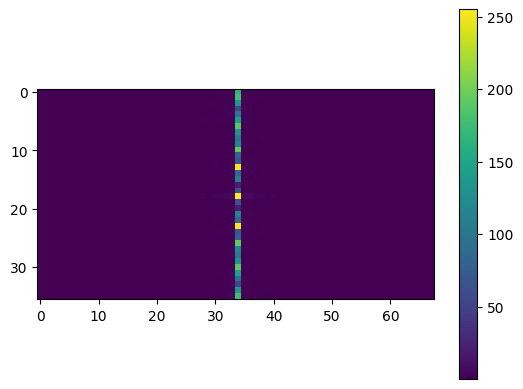

(36, 68)


In [ ]:
timeserie2image(first_elem[:,:68], 'test.png')

In [ ]:
assert False

AssertionError: 

[ 1 27 25  3 15  8 19] [ 5  6  7 11 14 16 17 21 22 23 26 28 29 30]


In [ ]:
train_data.columns

Index(['1',   0,   1,   2,   3,   4,   5,   6,   7,   8,
       ...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127],
      dtype='object', length=769)

In [ ]:
validation_data = train_data[train_data.iloc[:,0].isin(users_for_validation)]
train_data = train_data[train_data.iloc[:,0].isin(users_for_train)]
# Remove users from the data
train_data = train_data.iloc[:,1:]
validation_data = validation_data.iloc[:,1:]

In [ ]:
# Filtering the labels
train_y = train_y[train_y.iloc[:,0].isin(users_for_train)]
validation_y = train_y[train_y.iloc[:,0].isin(users_for_validation)]

In [ ]:
validation_y

,5


In [ ]:
users.shape, train_acc_x.shape, train_acc_y.shape, y_train.shape, train_total.shape

((7351, 1), (7351, 128), (7351, 128), (7351, 1), (7351, 128))